> ## **Line chart**

### Allowed functions : ```import pandas as pd, import sqlite3```

In [3]:
import pandas as pd
import sqlite3

## Cделать подключение к базе данных (она такая же, как и в предыдущий день)

In [ ]:
conn=sqlite3.connect('../data/checking-logs.sqlite')


query='''
select *
from sqlite_master
'''

pd.read_sql(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,pageviews,pageviews,2,"CREATE TABLE ""pageviews"" (\n""index"" INTEGER,\n..."
1,index,ix_pageviews_index,pageviews,3,"CREATE INDEX ""ix_pageviews_index""ON ""pageviews..."
2,table,checker,checker,19,"CREATE TABLE ""checker"" (\n""index"" INTEGER,\n ..."
3,index,ix_checker_index,checker,20,"CREATE INDEX ""ix_checker_index""ON ""checker"" (""..."
4,table,deadlines,deadlines,83,"CREATE TABLE ""deadlines"" (\n""index"" INTEGER,\n..."
5,index,ix_deadlines_index,deadlines,84,"CREATE INDEX ""ix_deadlines_index""ON ""deadlines..."


## Выполнить запрос, который получает дату и время из таблицы просмотров страниц, выбирая только пользователей, а не администраторов

In [92]:
query='''
select uid, datetime
from pageviews
where uid not like "admin%"
'''
df=pd.read_sql(query,conn, parse_dates='datetime')

## Используя Pandas, создайте новый фрейм данных, в котором посещения подсчитываются и группируются по дате.

In [97]:
dfByDatetime=df['datetime'].groupby(df['datetime'].dt.date).count()
dfByDatetime

datetime
2020-04-17      1
2020-04-18     23
2020-04-19     15
2020-04-21      3
2020-04-22      1
2020-04-23      5
2020-04-25      1
2020-04-26      8
2020-04-28      2
2020-04-29      4
2020-04-30      9
2020-05-01      3
2020-05-02      6
2020-05-03     19
2020-05-04      1
2020-05-05      1
2020-05-06      3
2020-05-07      2
2020-05-08     48
2020-05-09     19
2020-05-10    110
2020-05-11    200
2020-05-12     85
2020-05-13    102
2020-05-14    187
2020-05-15     29
2020-05-16      4
2020-05-17      9
2020-05-18     51
2020-05-19     11
2020-05-20     12
2020-05-21     11
2020-05-22      2
Name: datetime, dtype: int64

## используя метод Pandas .plot(), создайте график
### * размер шрифта должен быть 8
### * размер фигуры (15,8)
### * график должен иметь заголовок Просмотры в день
### * обратите внимание на вращение x-тиков на графике ниже

<Axes: title={'center': 'Views per day'}, xlabel='datetime'>

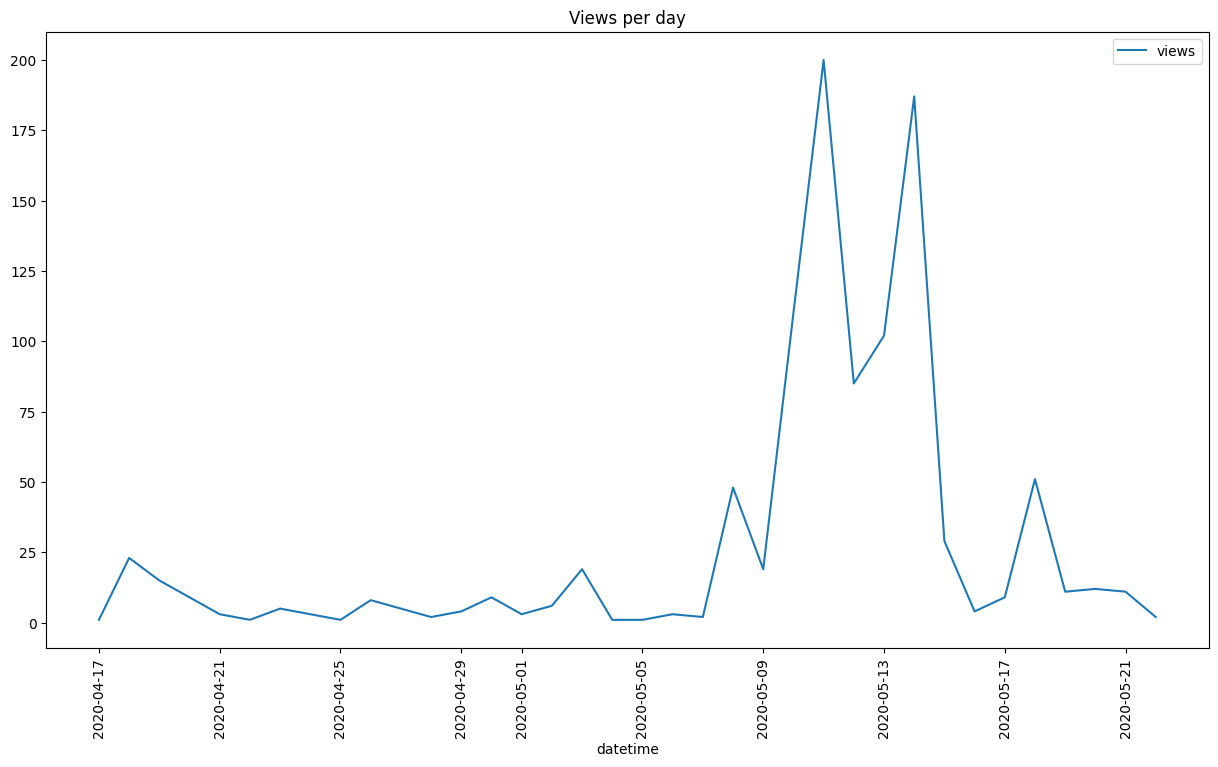

In [ ]:
dfByDatetime.plot(
    x='datetime',
    kind='line',
    figsize=(15,8),
    label='views',
    legend=True,
    title='Views per day',
    rot= 90,
)


## Закрыть соединение с базой данных

In [139]:
conn.close()